# Music Recommendation Project Using KMeans by Rohan Mahajan

In [12]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [13]:
#reading our data
df = pd.read_csv('/Users/rohanmahajan/Downloads/dataset 2.csv')
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [15]:
#checking for null values
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [16]:
#getting rid of null values
df = df.dropna()

In [17]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [18]:
#dropping duplicate tracks
df = df.drop_duplicates(subset = 'track_id', keep = 'first')
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [19]:
#initializing the label encoder
label_encoder = LabelEncoder()

In [20]:
#turning categorical 'explicit' data into numerical for scaling and clustering purposes
df['explicit'] = label_encoder.fit_transform(df['explicit'])


In [21]:
scaling_df = df.select_dtypes(np.number)
scaling_df

,Unnamed: 0,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,1,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,2,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,3,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,4,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,21,384999,0,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
113996,113996,22,385000,0,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
113997,113997,22,271466,0,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
113998,113998,41,283893,0,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


In [22]:
scaling_df = scaling_df.drop(columns = 'Unnamed: 0')

### Data Visualization

Now going to visualize the correlation between our data so that I know which columns are correlated with one another and which ones are not. Not only is this important to know to familiarize myself with the data, but also to see which columns are possibly going to be removed. We may need to remove columns because we have a good amount of them and some may make clustering less reliable.

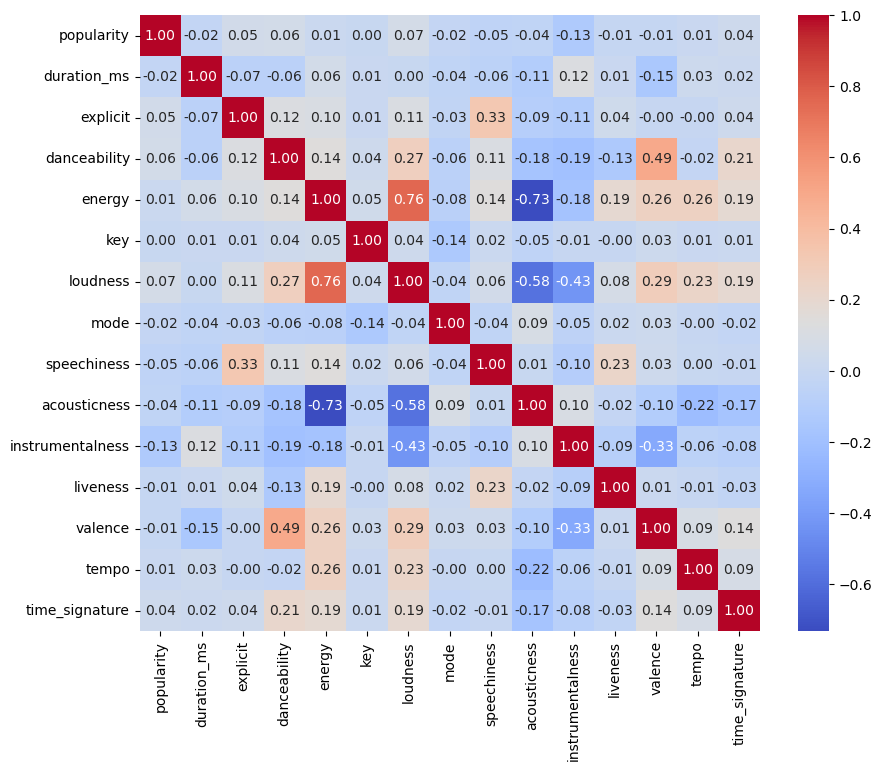

In [23]:
#visualization of correlation between our columns through heatmap 
correlation_matrix = scaling_df.corr()
#param for plt.figure is 'width', 'height' in inches
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [24]:
#initializing the standard scaler
standard_scaler = StandardScaler()
#normalizing our data using the standard scaler 
standard_scaler.fit(scaling_df)
scaled_data = standard_scaler.transform(scaling_df)
scaled_data

array([[ 1.93392497,  0.01347233, -0.30644737, ...,  0.93404711,
        -1.13359853,  0.22621588],
       [ 1.05931174, -0.70418575, -0.30644737, ..., -0.77026873,
        -1.47984261,  0.22621588],
       [ 1.15649098, -0.16218815, -0.30644737, ..., -1.32949737,
        -1.51825884,  0.22621588],
       ...,
       [-0.54414585,  0.37470962, -0.30644737, ...,  1.04056685,
         0.34265366,  0.22621588],
       [ 0.379057  ,  0.48473648, -0.30644737, ..., -0.21484437,
         0.46158791,  0.22621588],
       [-0.54414585,  0.11228135, -0.30644737, ...,  0.90741718,
        -1.42309816,  0.22621588]])

# Finding the optimal number of clusters using the Silhouette Method and Elbow Method

### SIlhouette Method

The Silhouette Method goes about calculating the ideal number of clusters for our KMeans algorithm through what is called a "silhouette score." The silhouette score is defined by s(b)-s(a)/MAX(s(b), s(a)). s(a) is the difference between a given datapoint and the other datapoints in its own cluster. s(b) is the difference between a given datapoint and the other datapoints in its nearest neighboring cluster. Naturally, we would want s(b) to be much larger than s(a) since that would indicate that datapoints in a home cluster are very distinct from datapoints in a neighboring cluster. The maximum (best) silhouette score is 1, while the minimum (worst) is -1. 

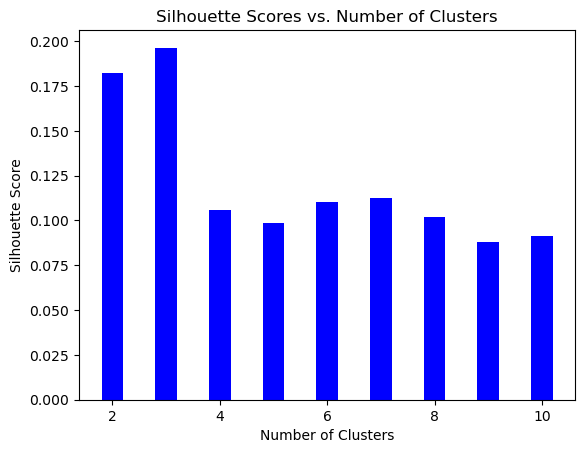

In [25]:
#Silhouette Method
from sklearn.metrics import silhouette_score
num_clusters = [2,3,4,5,6,7,8,9,10]
scores = []
for n_clusters in num_clusters:
    clusterer = KMeans(n_clusters = n_clusters, n_init = 'auto', random_state = 10)
    labels = clusterer.fit_predict(scaled_data)
    scores.append(silhouette_score(scaled_data, labels))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.bar(num_clusters, scores, color = 'blue', width = 0.4)
plt.title('Silhouette Scores vs. Number of Clusters')
plt.show()


#### By plotting the silhouette scores for various K values, we can see that the ideal number of clusters found using the Silhouette Method is 3

### Elbow Method

The elbow method calculates cluster inertia which is the average distance from the datapoints to the center of their respective cluster and plots this distance. The optimal number of clusters is determined by the "elbow" in the graph.

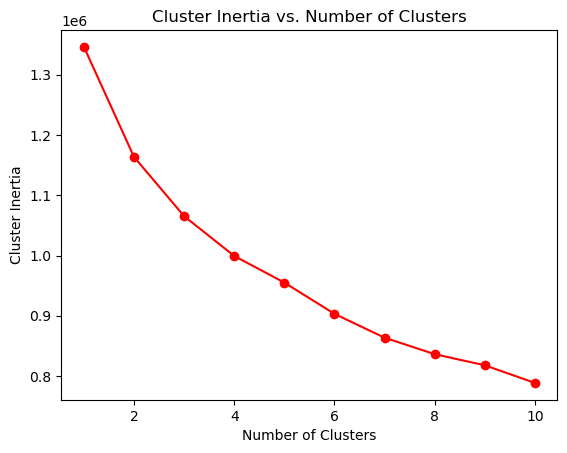

In [26]:
clusters = [1,2,3,4,5,6,7,8,9,10]
inertias = []
#fitting a KMeans model to our data and finding the cluster inertia for each # of clusters
for n_clusters in clusters: 
    model = KMeans(n_clusters = n_clusters, n_init = 'auto', random_state = 10)
    model.fit(scaled_data)
    inertias.append(model.inertia_)
#plotting our results
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Inertia')
plt.title('Cluster Inertia vs. Number of Clusters')
plt.plot(clusters, inertias, 'o-',color = 'red' )
plt.show()
    

#### From the elbow graph above, we can see that the ideal number of clusters according to the elbow method is 5, as that is where the so called "elbow" is formed

### Analysis of Clustering Method Results

The Silhouette Method showed that the optimal number of clusters for our data is 3 and the Elbow Method showed that the optimal number of clusters is 5. Therefore, we are going to visualize the clustering data with both 3 and 5 clusters.

In [35]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
#cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10))])
standard_scaler = StandardScaler()
X = df.select_dtypes(np.number)
X = standard_scaler.fit_transform(X)
kmeans = KMeans(n_clusters = 5)
song_clusterer = kmeans.fit(X)
df['cluster'] = song_clusterer.predict(X)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
u_labels = np.unique(df['cluster'])
u_labels

/Users/rohanmahajan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 1, 2, 3, 4], dtype=int32)

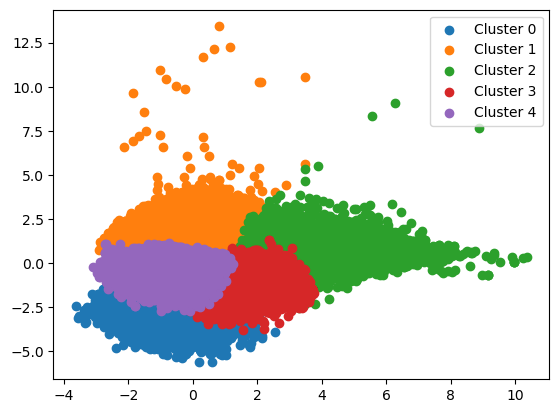

In [36]:
for i in u_labels:
    plt.scatter(X_reduced[df['cluster'] == i, 0], X_reduced[df['cluster'] == i, 1], label=f'Cluster {i}')
plt.legend()
plt.show()

In [31]:
standard_scaler = StandardScaler()
X = df.select_dtypes(np.number)
X = standard_scaler.fit_transform(X)
kmeans = KMeans(n_clusters = 3)
song_clusterer = kmeans.fit(X)
df['cluster'] = song_clusterer.predict(X)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
u_labels = np.unique(df['cluster'])
u_labels

/Users/rohanmahajan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 1, 2], dtype=int32)

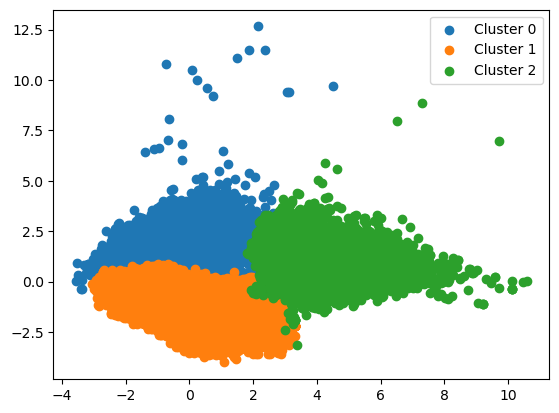

In [32]:
for i in u_labels:
    plt.scatter(X_reduced[df['cluster'] == i, 0], X_reduced[df['cluster'] == i, 1], label=f'Cluster {i}')
plt.legend()
plt.show()

After visualizing both of the potential clusterings, we can see that both 5 clusters and 3 clusters work very well with the data. I am going to choose to go with 5 clusterings for the song data. I feel that it is important to consider how large of a data set that I am working with, so I think it would be advantageous to separate our data more. 

### Now that we have completed the track clustering, we are going to cluster by genres as well to ensure that we are recommending songs that are in similar genres 

In [38]:
unique_genres = df['track_genre'].unique()
unique_genres

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [41]:
#establishing a new dataframe for the genre data, which will be based on the data in 'columns' for each genre
columns = ['genre', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']
genre_df = pd.DataFrame(columns = columns)
genre_df

,genre,popularity,duration_ms,explicit,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature


In [42]:
#averaging out the data in each of the columns in genre_df for each genre and appending this data to genre_df 
for genre in unique_genres:
    mean_attributes = []
    for column in columns:
        if column == 'genre':
            mean_attributes.append(genre)
        else:
            genre_data = df[df['track_genre'] == genre]
            mean_attributes.append(genre_data[column].mean())
    genre_df.loc[len(genre_df)] = mean_attributes

genre_df    

,genre,popularity,duration_ms,explicit,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,acoustic,42.483000,214896.957000,0.052000,0.549593,0.435368,0.043247,0.566816,0.038336,0.153244,0.424023,119.010624,3.885000
1,afrobeat,24.407407,248441.886887,0.018018,0.669408,0.702938,0.086622,0.270893,0.252876,0.184724,0.698475,119.242057,3.945946
2,alt-rock,33.896897,235356.597598,0.056056,0.534601,0.754027,0.055076,0.122168,0.054151,0.210340,0.518179,124.654403,3.938939
3,alternative,22.218673,206606.390663,0.312039,0.595523,0.684523,0.093618,0.185147,0.017173,0.209104,0.476821,119.748902,3.955774
4,ambient,44.208208,237250.574575,0.005005,0.367966,0.237257,0.041553,0.776701,0.675993,0.129298,0.167345,111.156413,3.653654
...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,techno,40.060096,318865.177885,0.021635,0.682798,0.777418,0.060354,0.055787,0.558594,0.164358,0.333679,128.966106,3.963942
109,trance,38.550847,292865.881356,0.014124,0.584840,0.844640,0.077663,0.035072,0.501777,0.236931,0.256119,135.270682,3.957627
110,trip-hop,34.386062,276691.504425,0.040929,0.642059,0.621687,0.075407,0.227056,0.385339,0.191628,0.479197,118.849285,3.939159
111,turkish,40.508046,217812.267816,0.245977,0.627002,0.619977,0.113911,0.301719,0.029716,0.180088,0.463705,121.141594,3.936782


In [43]:
#dropping features that we don't want to be scaled and involved in clustering
import copy
scaling_genre_df = genre_df.copy()
scaling_genre_df = scaling_genre_df.drop(columns = 'genre')
scaling_genre_df

,popularity,duration_ms,explicit,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,42.483000,214896.957000,0.052000,0.549593,0.435368,0.043247,0.566816,0.038336,0.153244,0.424023,119.010624,3.885000
1,24.407407,248441.886887,0.018018,0.669408,0.702938,0.086622,0.270893,0.252876,0.184724,0.698475,119.242057,3.945946
2,33.896897,235356.597598,0.056056,0.534601,0.754027,0.055076,0.122168,0.054151,0.210340,0.518179,124.654403,3.938939
3,22.218673,206606.390663,0.312039,0.595523,0.684523,0.093618,0.185147,0.017173,0.209104,0.476821,119.748902,3.955774
4,44.208208,237250.574575,0.005005,0.367966,0.237257,0.041553,0.776701,0.675993,0.129298,0.167345,111.156413,3.653654
...,...,...,...,...,...,...,...,...,...,...,...,...
108,40.060096,318865.177885,0.021635,0.682798,0.777418,0.060354,0.055787,0.558594,0.164358,0.333679,128.966106,3.963942
109,38.550847,292865.881356,0.014124,0.584840,0.844640,0.077663,0.035072,0.501777,0.236931,0.256119,135.270682,3.957627
110,34.386062,276691.504425,0.040929,0.642059,0.621687,0.075407,0.227056,0.385339,0.191628,0.479197,118.849285,3.939159
111,40.508046,217812.267816,0.245977,0.627002,0.619977,0.113911,0.301719,0.029716,0.180088,0.463705,121.141594,3.936782


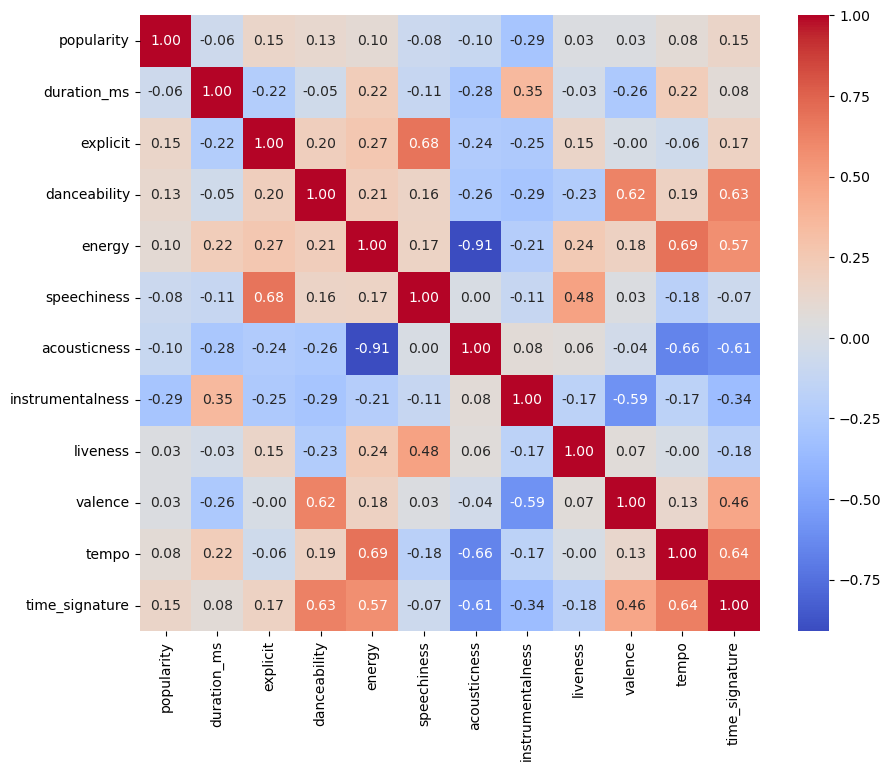

In [44]:
#correlation matrix for genre data
correlation_gf_matrix = scaling_genre_df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(correlation_gf_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [45]:
#scaling our data
standard_scaler.fit(scaling_genre_df)
scaled_genre_data = standard_scaler.transform(scaling_genre_df)
scaled_genre_data

array([[ 0.73276249, -0.29155666, -0.33953922, ..., -0.35340933,
        -0.3752575 , -0.15538592],
       [-0.82131074,  0.46332373, -0.61795206, ...,  1.53496669,
        -0.34882385,  0.37338104],
       [-0.0054392 ,  0.16885812, -0.30630814, ...,  0.2944382 ,
         0.26935958,  0.31258826],
       ...,
       [ 0.03661742,  1.09904073, -0.43024175, ...,  0.02621545,
        -0.39368515,  0.31450004],
       [ 0.56296318, -0.22595179,  1.24970566, ..., -0.08037293,
        -0.13186389,  0.29387127],
       [ 0.65136823,  1.48518296, -0.76557287, ..., -1.54256638,
        -0.1695017 , -0.51121468]])

#### Now, we will run the Elbow Method to figure out the optimal number of clusters, this time for the genre data

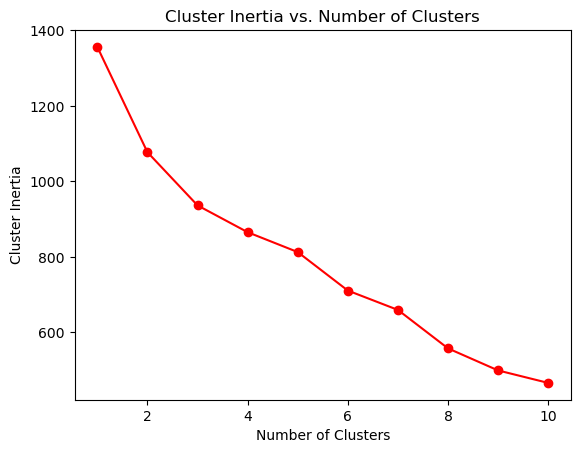

In [46]:
#Elbow Method
clusters = [1,2,3,4,5,6,7,8,9,10]
inertias = []
#fitting a KMeans model to our data and finding the cluster inertia for each # of clusters
for n_clusters in clusters: 
    model = KMeans(n_clusters = n_clusters, n_init = 'auto', random_state = 10)
    model.fit(scaled_genre_data)
    inertias.append(model.inertia_)
#plotting our results
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Inertia')
plt.title('Cluster Inertia vs. Number of Clusters')
plt.plot(clusters, inertias, 'o-',color = 'red' )
plt.show()

#### We can see that the 'elbow' of this elbow graph is when the number of clusters is 5, so we will use 5 as our number of clusters for the genre clustering.

### Creation and visualization of genre clusters

In [55]:
standard_scaler = StandardScaler()
kmeans = KMeans(n_clusters = 6)
genre_clusterer = kmeans.fit(scaling_genre_df)
genre_df['genre_cluster'] = genre_clusterer.predict(scaling_genre_df)
pca = PCA(n_components=2)
genre_df_reduced = pca.fit_transform(scaling_genre_df)
u_labels = np.unique(genre_df['genre_cluster'])
u_labels

/Users/rohanmahajan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 1, 2, 3, 4, 5], dtype=int32)

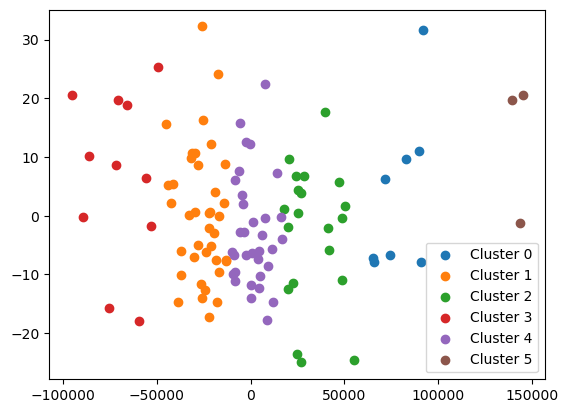

In [56]:
for i in u_labels:
    plt.scatter(genre_df_reduced[genre_df['genre_cluster'] == i, 0], genre_df_reduced[genre_df['genre_cluster'] == i, 1], label=f'Cluster {i}')
plt.legend()
plt.show()

In [57]:
genre_df

,genre,popularity,duration_ms,explicit,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre_cluster
0,acoustic,42.483000,214896.957000,0.052000,0.549593,0.435368,0.043247,0.566816,0.038336,0.153244,0.424023,119.010624,3.885000,1
1,afrobeat,24.407407,248441.886887,0.018018,0.669408,0.702938,0.086622,0.270893,0.252876,0.184724,0.698475,119.242057,3.945946,2
2,alt-rock,33.896897,235356.597598,0.056056,0.534601,0.754027,0.055076,0.122168,0.054151,0.210340,0.518179,124.654403,3.938939,4
3,alternative,22.218673,206606.390663,0.312039,0.595523,0.684523,0.093618,0.185147,0.017173,0.209104,0.476821,119.748902,3.955774,1
4,ambient,44.208208,237250.574575,0.005005,0.367966,0.237257,0.041553,0.776701,0.675993,0.129298,0.167345,111.156413,3.653654,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,techno,40.060096,318865.177885,0.021635,0.682798,0.777418,0.060354,0.055787,0.558594,0.164358,0.333679,128.966106,3.963942,0
109,trance,38.550847,292865.881356,0.014124,0.584840,0.844640,0.077663,0.035072,0.501777,0.236931,0.256119,135.270682,3.957627,0
110,trip-hop,34.386062,276691.504425,0.040929,0.642059,0.621687,0.075407,0.227056,0.385339,0.191628,0.479197,118.849285,3.939159,2
111,turkish,40.508046,217812.267816,0.245977,0.627002,0.619977,0.113911,0.301719,0.029716,0.180088,0.463705,121.141594,3.936782,4


In [58]:
#makes a new column in df and appends appropriate genre_cluster values for each track
genre_to_cluster = genre_df.set_index('genre')['genre_cluster'].to_dict()
df['genre_cluster'] = df['track_genre'].map(genre_to_cluster)
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,cluster,genre_cluster
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,...,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,4,1
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,...,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,3,1
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,...,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,3,1
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,...,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,2,1
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,...,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,0,0.172,0.2350,...,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,2,0
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,0,0.174,0.1170,...,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,2,0
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,0,0.629,0.3290,...,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,3,0
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,0,0.587,0.5060,...,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,3,0


In [59]:
#recommend songs function
def recommend_songs(input_track):
    genre_cluster = df.loc[df['track_name'] == input_track, 'genre_cluster'].values[0]
    song_cluster = df.loc[df['track_name'] == input_track, 'cluster'].values[0]
    return df.query('(genre_cluster == @genre_cluster) & (cluster == @song_cluster)').sample(n=3)
recommend_songs('Sleep My Little Boy')

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,cluster,genre_cluster
75169,75169,3TTAkX86WXiPmIW5uXig0c,Sayama,InSPAration,Drifting Through Time and Space,27,266733,0,0.323,0.183,...,0.0445,0.929,0.777,0.115,0.0367,139.342,4,new-age,2,0
75767,75767,1CvRmF7g2AtTJMwBxU5Ku4,Kevin Kern,In the Enchanted Garden,Paper Clouds,44,187600,0,0.531,0.173,...,0.0464,0.992,0.920,0.130,0.4750,106.520,4,new-age,2,0
75671,75671,1hz5dc9upDPbMq7c9Cxcza,Mike Oldfield,Tubular Bells 2003,Blues,23,160173,0,0.472,0.278,...,0.0310,0.737,0.900,0.234,0.2900,142.513,3,new-age,2,0


I am quite happy with how this project turned out. Before this, I had little exposure to unsupervised learning algorithms and I now feel like I have a great understanding of KMeans and its implementation